<a href="https://colab.research.google.com/github/Sibitenda/BAchelors_CS/blob/main/Artificial%20Intelligence/problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Problem Solving with AI

Uninformed Search Algorithms

The uninformed search algorithm does not have any domain knowledge, such as closeness, location of the goal state, etc. It behaves in a brute-force way. It only knows how to traverse the given tree and find the goal state. This algorithm is also known as the Blind search algorithm or brute-force algorithm. There are six types of uninformed search strategies.

They are:

    Breadth-first search
    Depth-first search
    Depth-limited search
    Iterative deepening depth-first search
    Bidirectional search
    Uniform cost search

In [1]:
#Breadth-first search
graph = {
 'A' : ['B','C'],
 'B' : ['D', 'E'],
 'C' : ['F', 'G'],
 'D' : [],
 'E' : [],
 'F' : [],
 'G' : []
}
visited = []
queue = []
goal = 'F'
def bfs(visited, graph, node):
    visited.append(node)
    queue.append(node)
    while queue:
        s = queue.pop(0)
        print (s, end = "\n")
        for neighbour in graph[s]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)
                if goal in visited:
                    break
bfs(visited, graph, 'A')

A
B
C
D
E
F


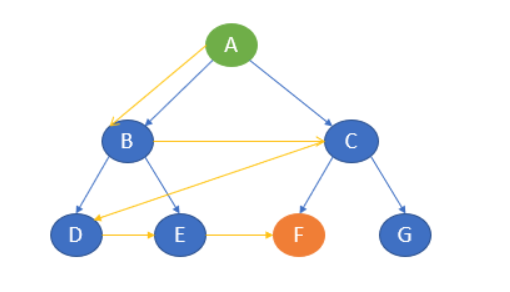

In [4]:
#Depth-first search
#Let’s try to code it.
graph = {
 'A' : ['B','C'],
 'B' : ['D', 'E'],
 'C' : ['F', 'G'],
 'D' : [],
 'E' : [],
 'F' : [],
 'G' : []
}
goal = 'F'
visited = set()
def dfs(visited, graph, node):
    if node not in visited:
        print (node)
        visited.add(node)
        for neighbour in graph[node]:
            if goal in visited:
                break
            else:
                dfs(visited, graph, neighbour)
dfs(visited, graph, 'A')

A
B
D
E
C
F


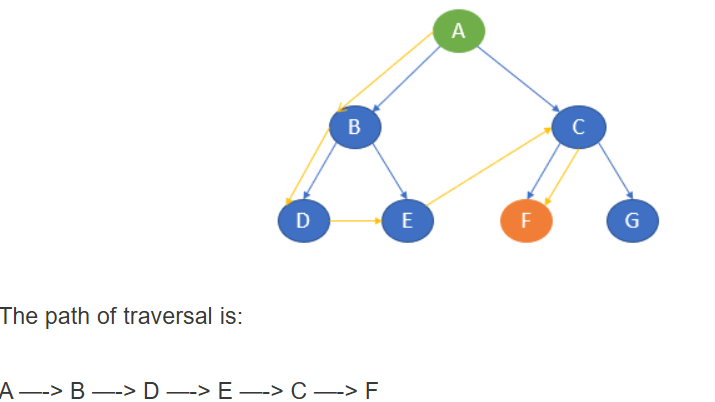

In [6]:
#Depth-limited search
# A —-> C

# If we give C as the goal node and the limit as 0, the algorithm will not return any path as the goal node is unavailable within the given limit.

# If we give the goal node as F and the limit as 2, the path will be A, C, F.


graph = {
 'A' : ['B','C'],
 'B' : ['D', 'E'],
 'C' : ['F', 'G'],
 'D' : [],
 'E' : [],
 'F' : [],
 'G' : []
}
def DLS(start,goal,path,level,maxD):
    print('nCurrent level-->',level)
    path.append(start)
    if start == goal:
        print("Goal test successful")
        return path
    print('Goal node testing failed')
    if level==maxD:
        return False
    print('nExpanding the current node',start)
    for child in graph[start]:
        if DLS(child,goal,path,level+1,maxD):
            return path
        path.pop()
    return False
start = 'A'
goal = input('Enter the goal node:-')
maxD = int(input("Enter the maximum depth limit:-"))
print()
path = list()
res = DLS(start,goal,path,0,maxD)
if(res):
    print("Path to goal node available")
    print("Path",path)
else:
    print("No path available for the goal node in given depth limit")

Enter the goal node:-F
Enter the maximum depth limit:-2

nCurrent level--> 0
Goal node testing failed
nExpanding the current node A
nCurrent level--> 1
Goal node testing failed
nExpanding the current node B
nCurrent level--> 2
Goal node testing failed
nCurrent level--> 2
Goal node testing failed
nCurrent level--> 1
Goal node testing failed
nExpanding the current node C
nCurrent level--> 2
Goal test successful
Path to goal node available
Path ['A', 'C', 'F']


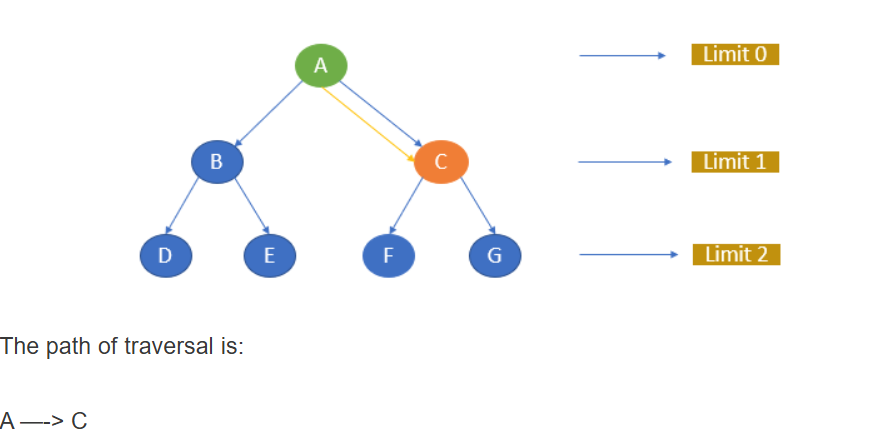

In [7]:
# Iterative deepening depth-first search

# Consider A as the start node and E as the goal node. Let the maximum depth be 2.
# The algorithm starts with A, moves to the next level, and searches for E. If it does not find E, it moves to the next level and finds it again.
graph = {
 'A' : ['B','C'],
 'B' : ['D', 'E'],
 'C' : ['F', 'G'],
 'D' : [],
 'E' : [],
 'F' : [],
 'G' : []
}
path = list()
def DFS(currentNode,destination,graph,maxDepth,curList):
    curList.append(currentNode)
    if currentNode==destination:
        return True
    if maxDepth<=0:
        path.append(curList)
        return False
    for node in graph[currentNode]:
        if DFS(node,destination,graph,maxDepth-1,curList):
            return True
        else:
            curList.pop()
    return False
def iterativeDDFS(currentNode,destination,graph,maxDepth):
    for i in range(maxDepth):
        curList = list()
        if DFS(currentNode,destination,graph,i,curList):
            return True
    return False
if not iterativeDDFS('A','E',graph,3):
    print("Path is not available")
else:
    print("Path exists")
    print(path.pop())


Path exists
['A', 'B', 'E']


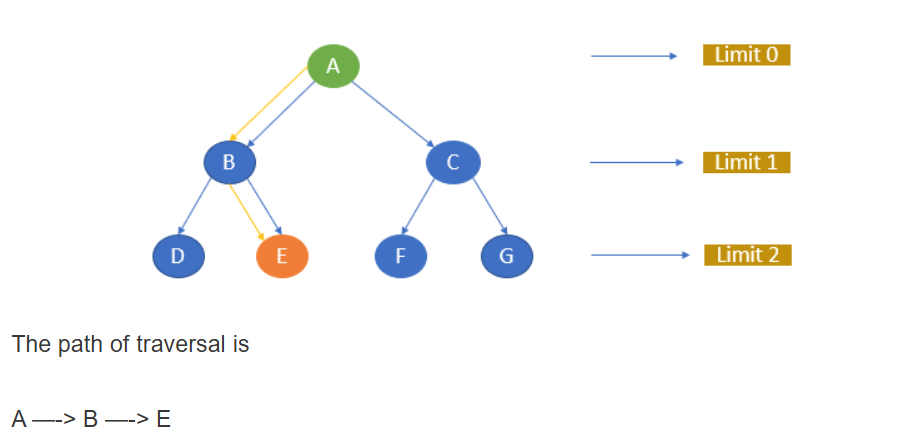

In [8]:
# Bidirectional search

# Bidirectional search requires the well-definition of both the start and goal start and the same branching factor in both directions.
from collections import deque
class Node:
    def __init__(self, val, neighbors=[]):
        self.val = val
        self.neighbors = neighbors
        self.visited_right = False
        self.visited_left = False
        self.parent_right = None
        self.parent_left = None
def bidirectional_search(s, t):
    def extract_path(node):
        node_copy = node
        path = []
        while node:
            path.append(node.val)
            node = node.parent_right
        path.reverse()
        del path[-1]
        while node_copy:
            path.append(node_copy.val)
            node_copy = node_copy.parent_left
        return path
    q = deque([])
    q.append(s)
    q.append(t)
    s.visited_right = True
    t.visited_left = True
    while len(q) > 0:
        n = q.pop()
        if n.visited_left and n.visited_right:
            return extract_path(n)
        for node in n.neighbors:
            if n.visited_left == True and not node.visited_left:
                node.parent_left = n
                node.visited_left = True
                q.append(node)
            if n.visited_right == True and not node.visited_right:
                node.parent_right = n
                node.visited_right = True
                q.append(node)
    return False
n0 = Node('A')
n1 = Node('B')
n2 = Node('C')
n3 = Node('D')
n4 = Node('E')
n5 = Node('F')
n6 = Node('G')
n0.neighbors = []
n1.neighbors = [n0]
n2.neighbors = [n0]
n3.neighbors = [n1]
n4.neighbors = [n1]
n5.neighbors = [n2]
n6.neighbors = [n2]
print(bidirectional_search(n4, n6))

['E', 'B', 'A', 'C', 'G']


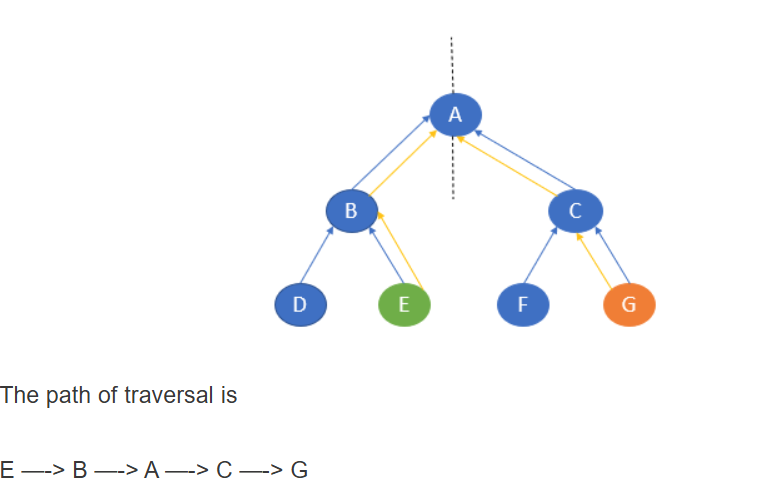

In [9]:
#Uniform cost search

# Uniform cost search is considered the best search algorithm for a weighted graph or graph with costs.
# It searches the graph by giving maximum priority to the lowest cumulative cost. Uniform cost search can be implemented using a priority queue.
# Here, S is the start node and G is the goal node.

# From S, G can be reached in the following ways.
# S, A, E, F, G -> 19
# S, B, E, F, G -> 18 ............
# S, B, D, F, G -> 19
# S, C, D, F, G -> 23

graph=[['S','A',6],
       ['S','B',5],
       ['S','C',10],
       ['A','E',6],
       ['B','E',6],
       ['B','D',7],
       ['C','D',6],
       ['E','F',6],
       ['D','F',6],
       ['F','G',1]]
temp = []
temp1 = []
for i in graph:
  temp.append(i[0])
  temp1.append(i[1])
nodes = set(temp).union(set(temp1))
def UCS(graph, costs, open, closed, cur_node):
  if cur_node in open:
    open.remove(cur_node)
  closed.add(cur_node)
  for i in graph:
    if(i[0] == cur_node and costs[i[0]]+i[2] < costs[i[1]]):
      open.add(i[1])
      costs[i[1]] = costs[i[0]]+i[2]
      path[i[1]] = path[i[0]] + ' -> ' + i[1]
  costs[cur_node] = 999999
  small = min(costs, key=costs.get)
  if small not in closed:
    UCS(graph, costs, open,closed, small)
costs = dict()
temp_cost = dict()
path = dict()
for i in nodes:
  costs[i] = 999999
  path[i] = ' '
open = set()
closed = set()
start_node = input("Enter the Start State: ")
open.add(start_node)
path[start_node] = start_node
costs[start_node] = 0
UCS(graph, costs, open, closed, start_node)
goal_node = input("Enter the Goal State: ")
print("Path with least cost is: ",path[goal_node])

Enter the Start State: S
Enter the Goal State: G
Path with least cost is:  S -> B -> E -> F -> G


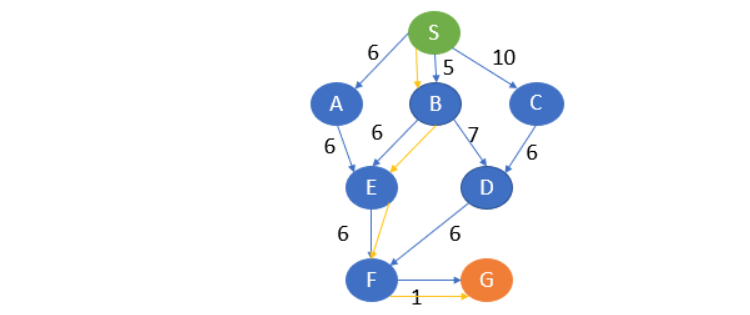

##Informed Search Algorithms
The informed search algorithm is also called heuristic search or directed search. In contrast to uninformed search algorithms, informed search algorithms require details such as distance to reach the goal, steps to reach the goal, and cost of the paths, which makes this algorithm more efficient.

Here, the goal state can be achieved by using the heuristic function.

The heuristic function achieves the goal state with the lowest cost possible. This function estimates how close a state is to the goal.

      1. Greedy best-first search algorithm
      2. A* search Algorithm

In [12]:
# Greedy best-first search algorithm

# Here, A is the start node, and H is the goal node.
# Greedy best-first search starts with A and then examines the next neighbours, B and C. Here, the heuristics of B are 12 and C are 4.
# The best path at the moment is C, so it goes to C. From C, it explores the neighbours F and G.
# The heuristics of F are 8 and G are 2, so it goes to G. From G, it goes to H, whose heuristic is 0, which is also our goal state.

graph = {
'A':[('B',12), ('C',4)],
'B':[('D',7), ('E',3)],
'C':[('F',8), ('G',2)],
'D':[],
'E':[('H',0)],
'F':[('H',0)],
'G':[('H',0)]
}
def bfs(start, target, graph, queue=[], visited=[]):
    if start not in visited:
        print(start)
        visited.append(start)
    queue=queue+[x for x in graph[start] if x[0][0] not in visited]
    queue.sort(key=lambda x:x[1])
    if queue[0][0]==target:
        print(queue[0][0])
    else:
        processing=queue[0]
        queue.remove(processing)
        bfs(processing[0], target, graph, queue, visited)
bfs('A', 'H', graph)

A
C
G
H


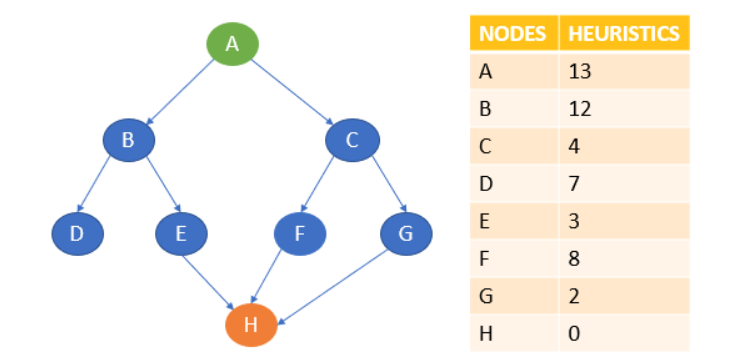
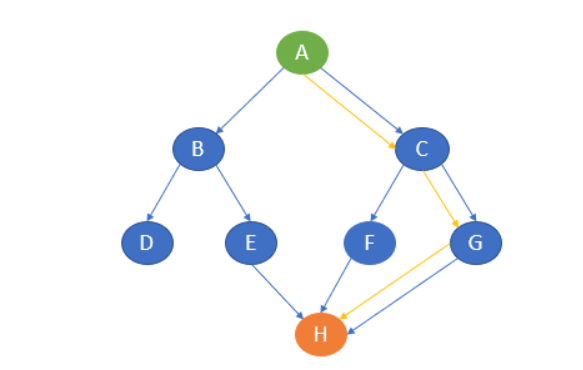

In [13]:
# A* search algorithm
# It is a combination of uniform cost search and greedy best-first search algorithms.
# It combines the advantages of both with better memory usage.
# It uses a heuristic function to find the shortest path.
# A* search algorithm uses the sum of the node’s cost and heuristic to find the best path.

# Let A be the start node, and H be the goal node.
# The algorithm will start with A. From A, it can move to B, C, or H.
graph=[['A','B',1,3],
       ['A','C',2,4],
       ['A','H',7,0],
       ['B','D',4,2],
       ['B','E',6,6],
       ['C','F',3,3],
       ['C','G',2,1],
       ['D','E',7,6],
       ['D','H',5,0],
       ['F','H',1,0],
       ['G','H',2, 0]]
temp = []
temp1 = []
for i in graph:
    temp.append(i[0])
    temp1.append(i[1])
nodes = set(temp).union(set(temp1))
def A_star(graph, costs, open, closed, cur_node):
    if cur_node in open:
        open.remove(cur_node)
    closed.add(cur_node)
    for i in graph:
        if(i[0] == cur_node and costs[i[0]]+i[2]+i[3] < costs[i[1]]):
            open.add(i[1])
            costs[i[1]] =  costs[i[0]]+i[2]+i[3]
            path[i[1]] = path[i[0]] + ' -> ' + i[1]
    costs[cur_node] = 999999
    small = min(costs, key=costs.get)
    if small not in closed:
        A_star(graph, costs, open,closed, small)
costs = dict()
temp_cost = dict()
path = dict()
for i in nodes:
    costs[i] = 999999
    path[i] = ' '
open = set()
closed = set()
start_node = input("Enter the Start Node: ")
open.add(start_node)
path[start_node] = start_node
costs[start_node] = 0
A_star(graph, costs, open, closed, start_node)
goal_node = input("Enter the Goal Node: ")
print("Path with least cost is: ",path[goal_node])

Enter the Start Node: A
Enter the Goal Node: H
Path with least cost is:  A -> C -> G -> H


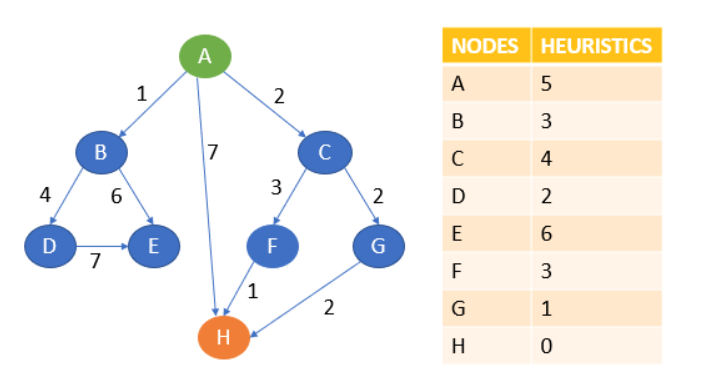

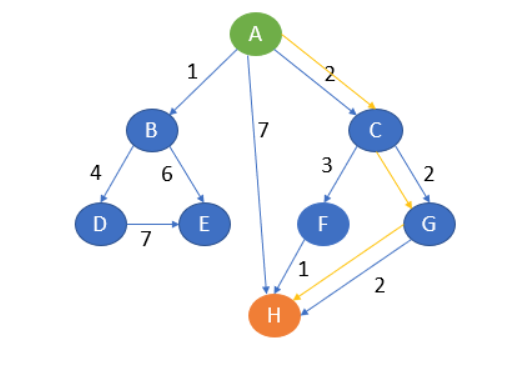

###Conclusion

Uninformed search is also known as blind search, whereas informed search is also called heuristics search. Uniformed search does not require much information, whereas informed search requires domain-specific details. Compared to uninformed search, informed search strategies are more efficient, and the time complexity of uninformed search strategies is greater. Informed search handles the problem better than blind search.

#Practical Examples

Maze Problem

Given a 5x5 grid maze, identify:

    a) Start state
    b) Goal state
    c) Possible actions from each cell
    d) A valid solution path using BFS.

BFS Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4)]


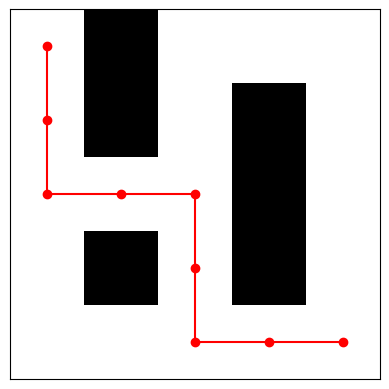

In [20]:
from collections import deque

# Maze: 0 = free cell, 1 = wall
maze = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0]
]

start = (0, 0)
goal = (4, 4)

def bfs(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    queue = deque([start])
    visited = set([start])
    parent = {start: None}

    while queue:
        node = queue.popleft()
        if node == goal:
            path = []
            while node:
                path.append(node)
                node = parent[node]
            return path[::-1]

        r, c = node
        for dr, dc in [(0,1),(1,0),(-1,0),(0,-1)]:
            nr, nc = r + dr, c + dc
            if 0 <= nr < rows and 0 <= nc < cols and maze[nr][nc] == 0 and (nr, nc) not in visited:
                queue.append((nr, nc))
                visited.add((nr, nc))
                parent[(nr, nc)] = (r, c)
    return None

path = bfs(maze, start, goal)
print("BFS Path:", path)

# Visualization
def draw_maze(maze, path=None):
    fig, ax = plt.subplots()
    ax.imshow(maze, cmap='binary')
    if path:
        x, y = zip(*path)
        ax.plot(y, x, marker='o', color='red')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

draw_maze(maze, path)

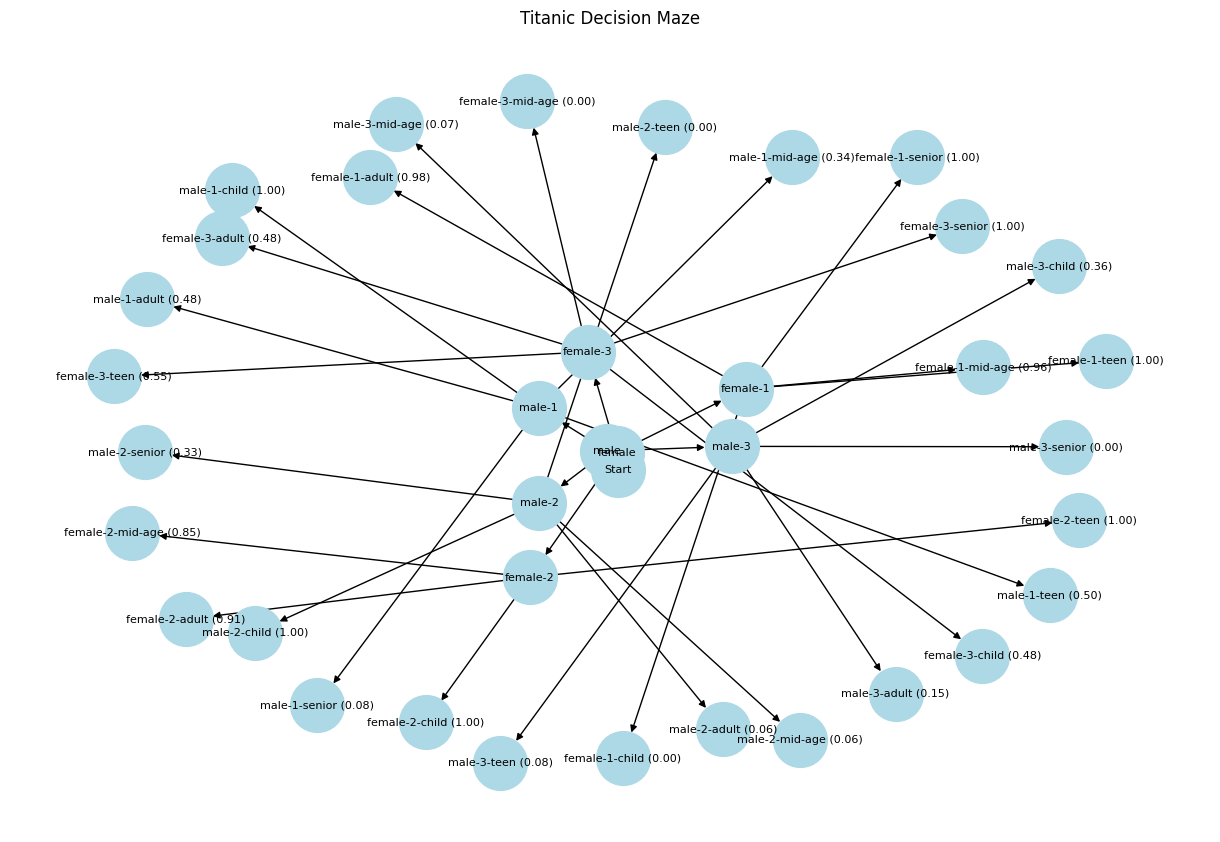

In [15]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load Titanic dataset from seaborn
import seaborn as sns
titanic = sns.load_dataset('titanic')

# Preprocess - drop NaN and select features
titanic = titanic[['sex', 'pclass', 'age', 'survived']].dropna()
titanic['age_group'] = pd.cut(titanic['age'], bins=[0,12,18,40,60,80],
                              labels=['child','teen','adult','mid-age','senior'])

# Build "maze" graph
G = nx.DiGraph()

# Start node
G.add_node("Start")

# Add decision paths
for sex in titanic['sex'].unique():
    G.add_edge("Start", sex)
    for pclass in sorted(titanic['pclass'].unique()):
        G.add_edge(sex, f"{sex}-{pclass}")
        for age_group in titanic['age_group'].unique():
            subset = titanic[(titanic['sex'] == sex) &
                             (titanic['pclass'] == pclass) &
                             (titanic['age_group'] == age_group)]
            if len(subset) > 0:
                survival_rate = subset['survived'].mean()
                label = f"{sex}-{pclass}-{age_group} ({survival_rate:.2f})"
                G.add_edge(f"{sex}-{pclass}", label)

# Visualize
plt.figure(figsize=(12,8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_size=8, node_size=1500)
plt.title("Titanic Decision Maze")
plt.show()


BFS Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4)]
A* Path: [(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4)]


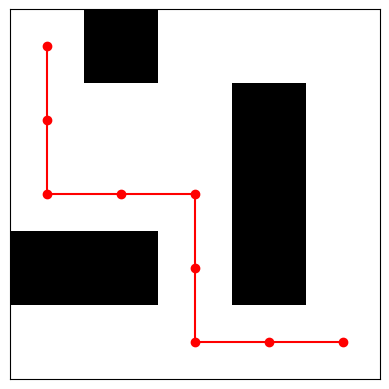

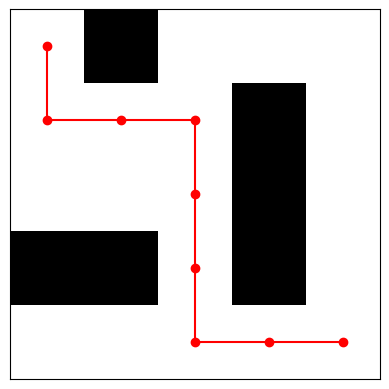

In [21]:
import matplotlib.pyplot as plt
from collections import deque
import heapq
import numpy as np

# 0 = path, 1 = wall
maze = np.array([
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0]
])

start = (0, 0)
goal = (4, 4)

# Directions: Up, Down, Left, Right
moves = [(-1,0), (1,0), (0,-1), (0,1)]

# BFS Implementation
def bfs(maze, start, goal):
    queue = deque([(start, [start])])
    visited = set()
    while queue:
        (x, y), path = queue.popleft()
        if (x, y) == goal:
            return path
        for dx, dy in moves:
            nx, ny = x + dx, y + dy
            if 0 <= nx < maze.shape[0] and 0 <= ny < maze.shape[1]:
                if maze[nx, ny] == 0 and (nx, ny) not in visited:
                    visited.add((nx, ny))
                    queue.append(((nx, ny), path + [(nx, ny)]))
    return None

# A* Implementation
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])  # Manhattan distance

def astar(maze, start, goal):
    pq = [(0 + heuristic(start, goal), 0, start, [start])]
    visited = set()
    while pq:
        est_total, cost, (x, y), path = heapq.heappop(pq)
        if (x, y) == goal:
            return path
        if (x, y) in visited:
            continue
        visited.add((x, y))
        for dx, dy in moves:
            nx, ny = x + dx, y + dy
            if 0 <= nx < maze.shape[0] and 0 <= ny < maze.shape[1]:
                if maze[nx, ny] == 0:
                    new_cost = cost + 1
                    heapq.heappush(pq, (new_cost + heuristic((nx, ny), goal), new_cost, (nx, ny), path + [(nx, ny)]))
    return None

# Solve the maze
bfs_path = bfs(maze, start, goal)
astar_path = astar(maze, start, goal)

print("BFS Path:", bfs_path)
print("A* Path:", astar_path)

# Visualization
def draw_maze(maze, path=None):
    fig, ax = plt.subplots()
    ax.imshow(maze, cmap='binary')
    if path:
        x, y = zip(*path)
        ax.plot(y, x, marker='o', color='red')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

draw_maze(maze, bfs_path)
draw_maze(maze, astar_path)


BFS: 8 moves, 17 nodes, 0.0001s


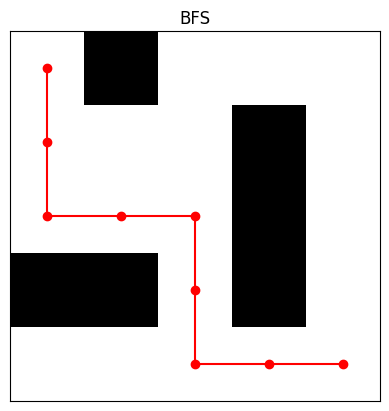

DFS: 8 moves, 9 nodes, 0.0001s


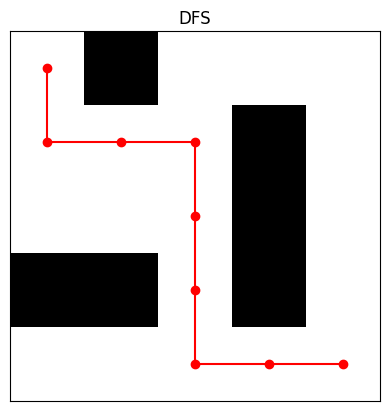

Dijkstra: 8 moves, 18 nodes, 0.0001s


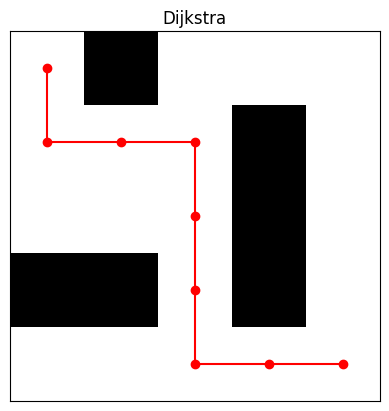

Greedy Best-First: 8 moves, 9 nodes, 0.0001s


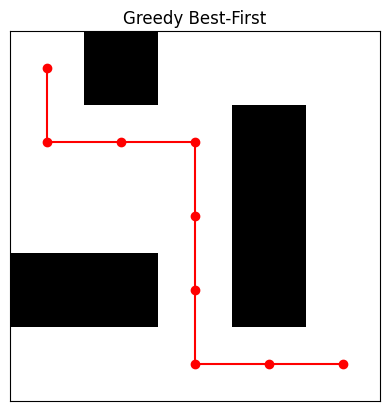

A*: 8 moves, 11 nodes, 0.0001s


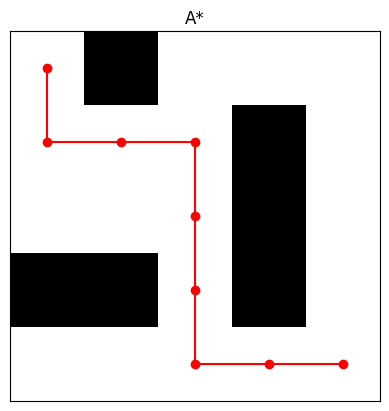

In [42]:
import matplotlib.pyplot as plt
from collections import deque
import heapq
import numpy as np
import time

# Maze layout (0 = path, 1 = wall)
base_maze = np.array([
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0]
])

start = (0, 0)
goal = (4, 4)
moves = [(-1,0), (1,0), (0,-1), (0,1)]

# Manhattan distance
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# Draw maze with path
def draw_maze(maze, path=None, title=""):
    fig, ax = plt.subplots()
    ax.imshow(maze, cmap='binary')
    if path:
        x, y = zip(*path)
        ax.plot(y, x, marker='o', color='red')
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

# BFS
def bfs(maze, start, goal):
    queue = deque([(start, [start])])
    visited = set([start])
    nodes_expanded = 0
    while queue:
        (x, y), path = queue.popleft()
        nodes_expanded += 1
        if (x, y) == goal:
            return path, nodes_expanded
        for dx, dy in moves:
            nx, ny = x + dx, y + dy
            if 0 <= nx < maze.shape[0] and 0 <= ny < maze.shape[1]:
                if maze[nx, ny] == 0 and (nx, ny) not in visited:
                    visited.add((nx, ny))
                    queue.append(((nx, ny), path + [(nx, ny)]))
    return None, nodes_expanded

# DFS
def dfs(maze, start, goal):
    stack = [(start, [start])]
    visited = set([start])
    nodes_expanded = 0
    while stack:
        (x, y), path = stack.pop()
        nodes_expanded += 1
        if (x, y) == goal:
            return path, nodes_expanded
        for dx, dy in moves:
            nx, ny = x + dx, y + dy
            if 0 <= nx < maze.shape[0] and 0 <= ny < maze.shape[1]:
                if maze[nx, ny] == 0 and (nx, ny) not in visited:
                    visited.add((nx, ny))
                    stack.append(((nx, ny), path + [(nx, ny)]))
    return None, nodes_expanded

# Dijkstra (Uniform Cost)
def dijkstra(maze, start, goal):
    pq = [(0, start, [start])]
    visited = set()
    nodes_expanded = 0
    while pq:
        cost, (x, y), path = heapq.heappop(pq)
        if (x, y) in visited:
            continue
        visited.add((x, y))
        nodes_expanded += 1
        if (x, y) == goal:
            return path, nodes_expanded
        for dx, dy in moves:
            nx, ny = x + dx, y + dy
            if 0 <= nx < maze.shape[0] and 0 <= ny < maze.shape[1] and maze[nx, ny] == 0:
                if (nx, ny) not in visited:
                    heapq.heappush(pq, (cost + 1, (nx, ny), path + [(nx, ny)]))
    return None, nodes_expanded

# Greedy Best-First Search
def greedy_best_first(maze, start, goal):
    pq = [(heuristic(start, goal), start, [start])]
    visited = set()
    nodes_expanded = 0
    while pq:
        _, (x, y), path = heapq.heappop(pq)
        if (x, y) in visited:
            continue
        visited.add((x, y))
        nodes_expanded += 1
        if (x, y) == goal:
            return path, nodes_expanded
        for dx, dy in moves:
            nx, ny = x + dx, y + dy
            if 0 <= nx < maze.shape[0] and 0 <= ny < maze.shape[1] and maze[nx, ny] == 0:
                if (nx, ny) not in visited:
                    heapq.heappush(pq, (heuristic((nx, ny), goal), (nx, ny), path + [(nx, ny)]))
    return None, nodes_expanded

# A*
def astar(maze, start, goal):
    pq = [(heuristic(start, goal), 0, start, [start])]
    visited = set()
    nodes_expanded = 0
    while pq:
        est_total, cost, (x, y), path = heapq.heappop(pq)
        if (x, y) in visited:
            continue
        visited.add((x, y))
        nodes_expanded += 1
        if (x, y) == goal:
            return path, nodes_expanded
        for dx, dy in moves:
            nx, ny = x + dx, y + dy
            if 0 <= nx < maze.shape[0] and 0 <= ny < maze.shape[1] and maze[nx, ny] == 0:
                if (nx, ny) not in visited:
                    new_cost = cost + 1
                    heapq.heappush(pq, (new_cost + heuristic((nx, ny), goal), new_cost, (nx, ny), path + [(nx, ny)]))
    return None, nodes_expanded

# Methods list
methods = [
    ("BFS", bfs),
    ("DFS", dfs),
    ("Dijkstra", dijkstra),
    ("Greedy Best-First", greedy_best_first),
    ("A*", astar)
]

# Run each method on its own maze copy
# for name, func in methods:
#     maze_copy = base_maze.copy()
#     start_time = time.time()
#     path, expanded = func(maze_copy, start, goal)
#     elapsed = time.time() - start_time
#     moves = len(path) - 1 if path else None
#     if moves is None:
#         print(f"{name}: No solution found, expanded {expanded} nodes in {elapsed:.4f}s")
#     else:
#         print(f"{name}: {moves} moves, {expanded} nodes, {elapsed:.4f}s")
#         draw_maze(maze_copy, path, title=name)
for name, func in methods:
    maze_copy = base_maze.copy()
    start_time = time.time()
    path, expanded = func(maze_copy, start, goal)
    elapsed = time.time() - start_time
    num_moves = len(path) - 1 if path else None  # renamed here
    if num_moves is None:
        print(f"{name}: No solution found, expanded {expanded} nodes in {elapsed:.4f}s")
    else:
        print(f"{name}: {num_moves} moves, {expanded} nodes, {elapsed:.4f}s")
        draw_maze(maze_copy, path, title=name)



Route Planning with A* (Real City Map)

In [23]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 4.3 MB/s eta 0:00:00


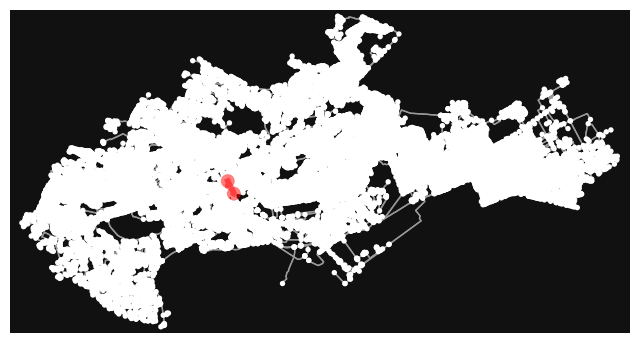

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [29]:
import osmnx as ox
import networkx as nx

place = "Nairobi, Kenya"
G = ox.graph_from_place(place, network_type="drive")

orig = ox.distance.nearest_nodes(G, 36.8219, -1.2921)  # coords
dest = ox.distance.nearest_nodes(G, 36.8172, -1.2833)

route = nx.shortest_path(G, orig, dest, weight="length")
ox.plot_graph_route(G, route)


In [25]:
dest

30215020

In [27]:
orig

6172933744

Tic-Tac-Toe AI with Minimax

In [34]:
import math

def print_board(board):
    for row in board:
        print(row)
    print()

def check_winner(board):
    for row in board:
        if row.count(row[0]) == len(row) and row[0] != " ":
            return row[0]
    for col in range(len(board)):
        if all(board[row][col] == board[0][col] != " " for row in range(len(board))):
            return board[0][col]
    if all(board[i][i] == board[0][0] != " " for i in range(len(board))) or \
       all(board[i][len(board)-1-i] == board[0][len(board)-1] != " " for i in range(len(board))):
        return board[0][0]
    return None

def minimax(board, depth, is_maximizing):
    winner = check_winner(board)
    if winner == "X": return -1
    if winner == "O": return 1
    if all(board[row][col] != " " for row in range(len(board)) for col in range(len(board))):
        return 0

    if is_maximizing:
        best_score = -math.inf
        for r in range(len(board)):
            for c in range(len(board)):
                if board[r][c] == " ":
                    board[r][c] = "O"
                    score = minimax(board, depth + 1, False)
                    board[r][c] = " "
                    best_score = max(score, best_score)
        return best_score
    else:
        best_score = math.inf
        for r in range(len(board)):
            for c in range(len(board)):
                if board[r][c] == " ":
                    board[r][c] = "X"
                    score = minimax(board, depth + 1, True)
                    board[r][c] = " "
                    best_score = min(score, best_score)
        return best_score

def best_move(board):
    best_score = -math.inf
    move = None
    for r in range(len(board)):
        for c in range(len(board)):
            if board[r][c] == " ":
                board[r][c] = "0"
                score = minimax(board, 0, False)
                board[r][c] = " "
                if score > best_score:
                    best_score = score
                    move = (r, c)
    return move

# Example 3x3 Tic-Tac-Toe
board = [[" "]*3 for _ in range(3)]
print_board(board)
move = best_move(board)
print("AI chooses:", move)


[' ', ' ', ' ']
[' ', ' ', ' ']
[' ', ' ', ' ']

AI chooses: (0, 0)


In [35]:
import itertools

distances = {
    (0,1): 10, (0,2): 15, (0,3): 20,
    (1,2): 35, (1,3): 25,
    (2,3): 30
}

def get_distance(a, b):
    return distances.get((a,b), distances.get((b,a), float('inf')))

nodes = [0,1,2,3]
min_cost = float("inf")
best_path = None

for perm in itertools.permutations(nodes[1:]):
    path = (0,) + perm + (0,)
    cost = sum(get_distance(path[i], path[i+1]) for i in range(len(path)-1))
    if cost < min_cost:
        min_cost = cost
        best_path = path

print("Best path:", best_path, "with cost", min_cost)


Best path: (0, 1, 3, 2, 0) with cost 80


In [39]:
import heapq, time
from collections import deque

# -------- Utility functions --------
def heuristic(state, goal):
    """Manhattan distance"""
    return sum(
        abs(state.index(i)//3 - goal.index(i)//3) +
        abs(state.index(i)%3 - goal.index(i)%3)
        for i in range(1, 9)
    )

def get_neighbors(state):
    """Generate all possible states from moving the blank"""
    zero = state.index(0)
    r, c = divmod(zero, 3)
    for dr, dc in [(0,1),(1,0),(0,-1),(-1,0)]:
        nr, nc = r + dr, c + dc
        if 0 <= nr < 3 and 0 <= nc < 3:
            neighbor = state[:]
            idx = nr * 3 + nc
            neighbor[zero], neighbor[idx] = neighbor[idx], neighbor[zero]
            yield neighbor

def reconstruct_path(came_from, start, goal):
    path = []
    current = goal
    while current is not None:
        path.append(current)
        current = came_from.get(tuple(current))
    return path[::-1]

# -------- Search Algorithms --------
def bfs(start, goal):
    frontier = deque([start])
    came_from = {tuple(start): None}
    nodes_expanded = 0

    while frontier:
        current = frontier.popleft()
        nodes_expanded += 1
        if current == goal:
            return came_from, nodes_expanded
        for neighbor in get_neighbors(current):
            t_neighbor = tuple(neighbor)
            if t_neighbor not in came_from:
                came_from[t_neighbor] = current
                frontier.append(neighbor)
    return None, nodes_expanded

def dfs(start, goal, limit=5000):
    frontier = [start]
    came_from = {tuple(start): None}
    nodes_expanded = 0

    while frontier and nodes_expanded < limit:
        current = frontier.pop()
        nodes_expanded += 1
        if current == goal:
            return came_from, nodes_expanded
        for neighbor in get_neighbors(current):
            t_neighbor = tuple(neighbor)
            if t_neighbor not in came_from:
                came_from[t_neighbor] = current
                frontier.append(neighbor)
    return None, nodes_expanded

def greedy_best_first(start, goal):
    frontier = [(heuristic(start, goal), start)]
    came_from = {tuple(start): None}
    nodes_expanded = 0

    while frontier:
        _, current = heapq.heappop(frontier)
        nodes_expanded += 1
        if current == goal:
            return came_from, nodes_expanded
        for neighbor in get_neighbors(current):
            t_neighbor = tuple(neighbor)
            if t_neighbor not in came_from:
                came_from[t_neighbor] = current
                heapq.heappush(frontier, (heuristic(neighbor, goal), neighbor))
    return None, nodes_expanded

def astar(start, goal):
    frontier = [(heuristic(start, goal), start)]
    came_from = {tuple(start): None}
    cost_so_far = {tuple(start): 0}
    nodes_expanded = 0

    while frontier:
        _, current = heapq.heappop(frontier)
        nodes_expanded += 1
        if current == goal:
            return came_from, nodes_expanded
        for neighbor in get_neighbors(current):
            new_cost = cost_so_far[tuple(current)] + 1
            t_neighbor = tuple(neighbor)
            if t_neighbor not in cost_so_far or new_cost < cost_so_far[t_neighbor]:
                cost_so_far[t_neighbor] = new_cost
                priority = new_cost + heuristic(neighbor, goal)
                heapq.heappush(frontier, (priority, neighbor))
                came_from[t_neighbor] = current
    return None, nodes_expanded

# -------- Run and Compare --------
def run_search(method, start, goal):
    start_time = time.time()
    came_from, nodes_expanded = method(start, goal)
    elapsed = time.time() - start_time
    if came_from is None:
        return None, nodes_expanded, elapsed
    path = reconstruct_path(came_from, start, goal)
    return len(path)-1, nodes_expanded, elapsed

start_state = [1,2,3,4,5,6,7,0,8]
goal_state  = [1,2,3,4,5,6,7,8,0]

methods = [
    ("BFS", bfs),
    ("DFS", dfs),
    ("Greedy Best-First", greedy_best_first),
    ("A*", astar)
]

print(f"{'Method':20} {'Moves':>8} {'Expanded':>10} {'Time (s)':>10}")
print("-"*50)
# for name, func in methods:
#     moves, expanded, t = run_search(func, start_state, goal_state)
#     print(f"{name:20} {moves:8} {expanded:10} {t:10.4f}")
for name, func in methods:
    moves, expanded, t = run_search(func, start_state, goal_state)
    if moves is None:  # No solution found
        print(f"{name:20} {'No Sol':>8} {expanded:10} {t:10.4f}")
    else:
        print(f"{name:20} {moves:8} {expanded:10} {t:10.4f}")


Method                  Moves   Expanded   Time (s)
--------------------------------------------------
BFS                         1          2     0.0000
DFS                    No Sol       5000     0.0148
Greedy Best-First           1          2     0.0001
A*                          1          2     0.0000


If you pick a harder start state, you’ll see BFS blow up in nodes, DFS wander around, and A* usually win.